# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [4]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 34 (delta 4), reused 2 (delta 2), pack-reused 24
Receiving objects: 100% (34/34), 7.18 MiB | 22.27 MiB/s, done.
Resolving deltas: 100% (7/7), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [5]:
#1
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("/content/visualization/assignment/data/college_completion.csv")


In [6]:
#2
df.shape # 3798 rows/observations and 63 columns
df.columns.tolist() # list of available variables
df.head() # variables include city, state, level

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [7]:
#3
pd.crosstab(df['control'], df['level'])
# there are more public 2-year universities than private 2-year universities
# private not-for-profit unis have more 4-year unis than 2-year unis and so do private for-profit unis though there is less of a difference between the two

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


<Axes: >

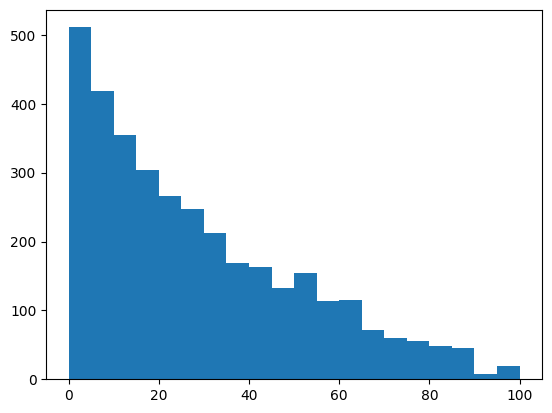

In [8]:
#4
var = 'grad_100_value'
df[var].hist(bins=20, grid=False) # histogram

<Axes: xlabel='grad_100_value', ylabel='Density'>

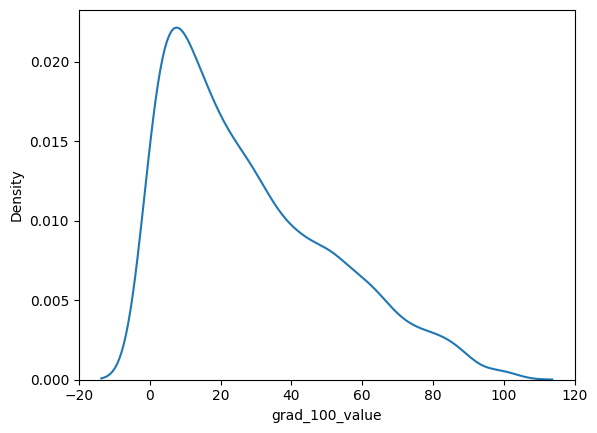

In [9]:
sns.kdeplot(df[var]) #kernel density plot

<Axes: >

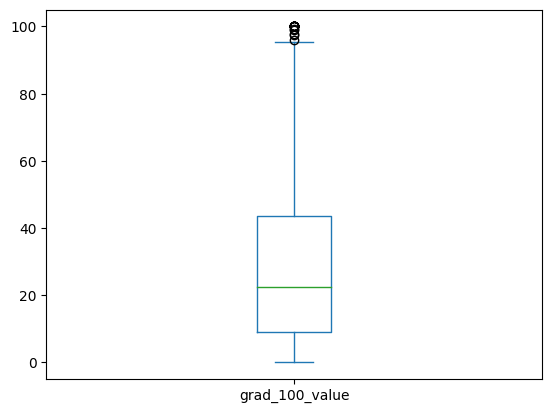

In [10]:
df[var].plot.box() # box plot

In [11]:
descr = df[var].describe() # statistical description
print(descr,'/n')

# Computing the Variance:
std = descr[2] # Accessing the standard deviation from the description object
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = descr[6] # Getting the 75% percentile
firstQ = descr[4] # Getting the 25% percentile
IQR = thirdQ - firstQ # Computing the IQR
print('IQR: ', IQR)

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64 /n
Variance:  543.4833820203381 

IQR:  34.650000000000006


<Axes: ylabel='Density'>

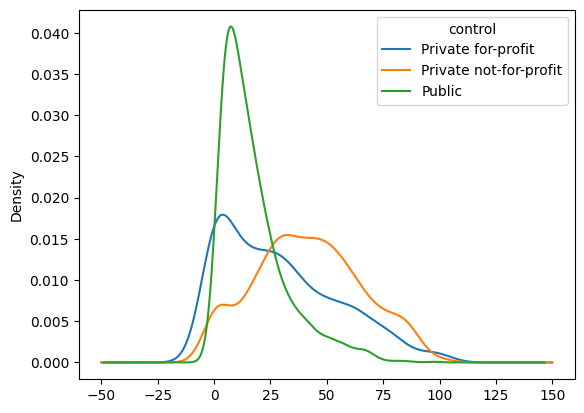

In [14]:
#5
group_by = 'control'
var = 'grad_100_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
# percent of students completing degree w/in 100% of time is typically towards the greater range for private-not-for-profit unis
# lowest percent of students completing degree w/in 100% of time is in public unis
# graduation rates appear to be best for private-not-for-profits, followed by private for-profits, followed by public unis

<Axes: ylabel='Density'>

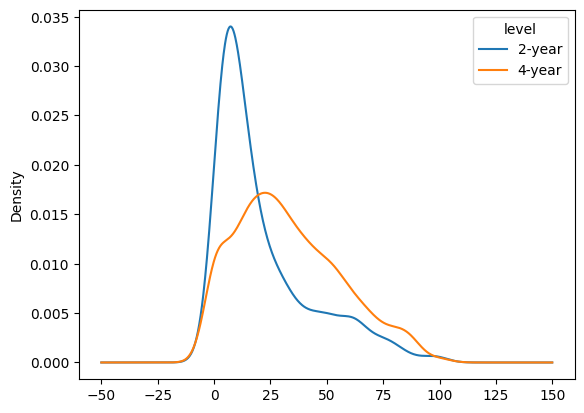

In [15]:
group_by = 'level'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
# lower percent of students completing degree w/in 100% of time for  2-year uni than for 4-year uni typically
# percent of students completeing degree w/in 100% of time is skewed towards upper range for 4-year unis, which appear to have better graduation rates


In [ ]:
#6
df['levelXcontrol']=df['level']+','+df['control']
group_by = 'levelXcontrol'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
# institutions appearing to have best grad rates are 2 year and 4 year private-not-for profit and 2 year private for-profit

In [ ]:
#7
sns.kdeplot(df["aid_value"])
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
# peak near 0-10000 due to both 2-year and 4-year public unis and 4 year private for-profit unis
# hump near 10000-20000 due to all other unis typically giving aid around these values




Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
df.plot.scatter(y=var,x='aid_value')
# as aid value increases, graduation rates typically increase, though many given no aid also have high graduation rates
sns.scatterplot(data=df, y=var, x="aid_value", hue="level")
# 4 year unis typically give more aid than 2 years which usually give less than 100000 in aid
# for 4-year unis, more aid seems to increase graduation rates

In [ ]:
sns.scatterplot(data=df, y=var, x="aid_value", hue="control")
# private for-profit unis typically recieve the least aid followed by public unis than private not-for-profit unis
# for private not-for-profit units, more aid seems to increase graduation rates

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data

- Will be using dataset about Medicare Part D Prescribers by Geography and Drug Data from 2021
https://data.cms.gov/search?filter_Topics=Drugs
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
- I think the data dictionary was well documented
- Will mention all possible variables and what they mean because some naming conventions are not necessarily intutive
-Describes how some variables are blank like for instance, counts of less than 11 of unique Medicare beneficiaries with at least one claim for a drug are undicated by a blank
- For numeric variables, it details how some values are bottom and top coded with limits and that supressed values are indicated with blanks as well
- Supressed values are given reasoning why
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [17]:
#1
from google.colab import drive
drive.mount('/content/gdrive')
mdf = pd.read_csv("gdrive/My Drive/MUP_DPR_RY23_P04_V10_DY21_Geo.csv", low_memory = False)
print(mdf.shape)
print(mdf.dtypes)
print(mdf.columns[1:5])
# Pick out a few interesting variables, and explain why you find them jointly interesting.
# Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook
mdf.head()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(114891, 22)
Prscrbr_Geo_Lvl          object
Prscrbr_Geo_Cd           object
Prscrbr_Geo_Desc         object
Brnd_Name                object
Gnrc_Name                object
Tot_Prscrbrs              int64
Tot_Clms                  int64
Tot_30day_Fills         float64
Tot_Drug_Cst            float64
Tot_Benes               float64
GE65_Sprsn_Flag          object
GE65_Tot_Clms           float64
GE65_Tot_30day_Fills    float64
GE65_Tot_Drug_Cst       float64
GE65_Bene_Sprsn_Flag     object
GE65_Tot_Benes          float64
LIS_Bene_Cst_Shr        float64
NonLIS_Bene_Cst_Shr     float64
Opioid_Drug_Flag         object
Opioid_LA_Drug_Flag      object
Antbtc_Drug_Flag         object
Antpsyct_Drug_Flag       object
dtype: object
Index(['Prscrbr_Geo_Cd', 'Prscrbr_Geo_Desc', 'Brnd_Name', 'Gnrc_Name'], dtype='object')


,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,Prscrbr_Geo_Desc,Brnd_Name,Gnrc_Name,Tot_Prscrbrs,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Benes,...,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes,LIS_Bene_Cst_Shr,NonLIS_Bene_Cst_Shr,Opioid_Drug_Flag,Opioid_LA_Drug_Flag,Antbtc_Drug_Flag,Antpsyct_Drug_Flag
0,National,NaN,National,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1178,3708,6598.5,102280.76,1313.0,...,5385.3,79992.58,NaN,1052.0,4167.66,22903.26,N,N,N,N
1,National,NaN,National,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1604,4564,7905.6,131927.33,1766.0,...,6603.0,106683.88,NaN,1450.0,4415.22,20335.83,N,N,N,N
2,National,NaN,National,Abacavir,Abacavir Sulfate,3560,30534,37402.4,7039482.37,4252.0,...,19275.5,3547013.16,NaN,2141.0,21278.04,186025.79,N,N,N,N
3,National,NaN,National,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,2933,30248,38810.9,9656849.77,4030.0,...,22159.0,5457642.63,NaN,2272.0,23576.53,376349.75,N,N,N,N
4,National,NaN,National,Abacavir-Lamivudine-Zidovudine,Abacavir/Lamivudine/Zidovudine,38,118,120.0,146795.20,32.0,...,74.0,91779.21,NaN,19.0,1488.48,3939.47,N,N,N,N


In [18]:
state = mdf["Prscrbr_Geo_Desc"]
print(state.unique())

state = state.replace(['American Samoa', 'Guam', 'Northern Mariana Islands','Puerto Rico',
 'Virgin Islands', 'Armed Forces Central/South America',
 'Armed Forces Europe', 'Armed Forces Pacific', 'Unknown' ,'Foreign Country', 'National'], "Other") # All watercraft/boating values
mdf['Prscrbr_Geo_Desc'] = state
del state
mdf['Prscrbr_Geo_Desc'].value_counts()

# mdf['Prscrbr_Geo_Desc'].value_counts()[:30].plot(kind='barh')
# # make all other
# # get rid of unknown in graph
# # get rid of national - data aggregated at national level cannot be attributed to a single state
# # What states get flagged the most for opioids, antibiotics, antipsychotics

noncost = mdf["NonLIS_Bene_Cst_Shr"]
sns.scatterplot(data=mdf, y=var, x="aid_value", hue="control")

['National' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming'
 'American Samoa' 'Guam' 'Northern Mariana Islands' 'Puerto Rico'
 'Virgin Islands' 'Armed Forces Central/South America'
 'Armed Forces Europe' 'Armed Forces Pacific' 'Unknown' 'Foreign Country']


ValueError: Could not interpret value `aid_value` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='NonLIS_Bene_Cst_Shr', ylabel='Density'>

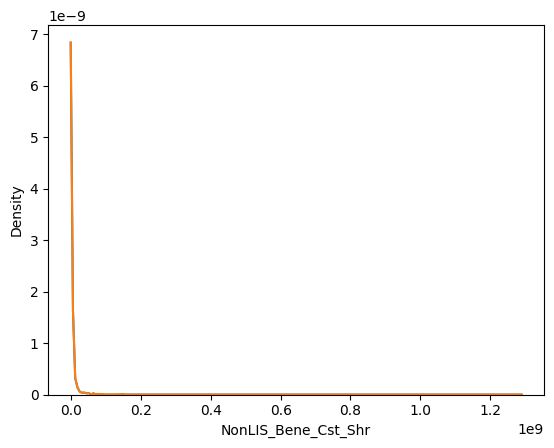

In [19]:
# cleaning aggregate total cost that beneficiaries using a drug, with no low-income subsidy paid
# numeric variable
nolow = mdf["NonLIS_Bene_Cst_Shr"]
nolow = nolow.replace(' ',np.nan) # set blank values as np.nan
sns.kdeplot(noncost) #kernel density plot shows extreme large values
# nolow.plot.box()
new_mdf = mdf[nolow < 100000000]
newnolow = new_mdf["NonLIS_Bene_Cst_Shr"]
sns.kdeplot(nolow)


<Axes: xlabel='GE65_Tot_Benes', ylabel='Density'>

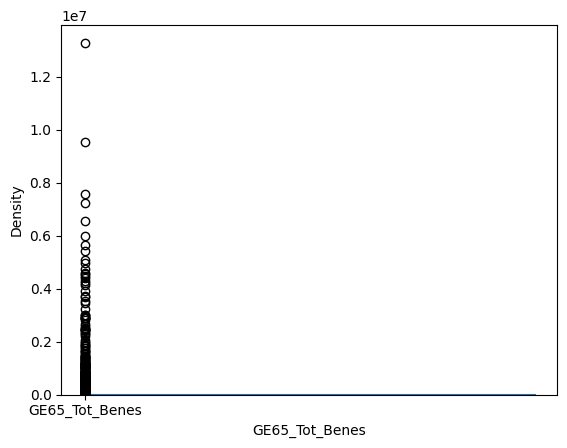

In [20]:
tot = mdf["GE65_Tot_Benes"]
sns.kdeplot(tot)
tot.plot.box()

In [21]:
opioid = mdf['Opioid_Drug_Flag']
opioid = opioid.replace(' ',np.nan)

<Axes: xlabel='GE65_Tot_Benes', ylabel='NonLIS_Bene_Cst_Shr'>

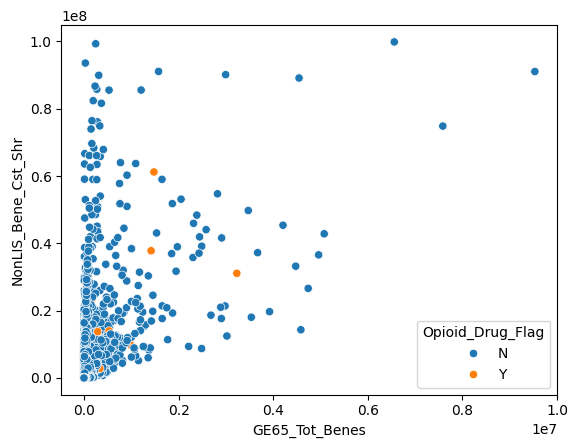

In [22]:
sns.scatterplot(data=mdf, y=newnolow, x=tot, hue = opioid)